In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.special import erfc
import math

def Q(x):
    return (0.5 * erfc(x/(np.sqrt(2))))

In [3]:
def Pb_BPSK(EbN0):
    return Q(np.sqrt(2*EbN0))

In [4]:
def Pb_DE_BPSK(EbN0):
    return 2 * Q(np.sqrt(2*EbN0)) - 2 * Q(np.sqrt(2*EbN0))**2

In [5]:
def Pb_QPSK(EbN0):
    return Q(np.sqrt(2*EbN0))

In [6]:
def Pb_DE_QPSK(EbN0):
    return 2 * Q(np.sqrt(2*EbN0)) * (1 - Q(np.sqrt(2*EbN0)))

In [7]:
def dB(x):
    return 10 * math.log10(x)
def from_dB(x):
    return math.pow(10, x/10)

In [8]:
def berawgn_BPSK(EbN0):
    """ Calculates theoretical bit error rate in AWGN (for BPSK and given Eb/N0) """
    return Pb_BPSK(from_dB(EbN0))

In [9]:
x_data = np.linspace(0, 10, 100 + 1)

In [10]:
y_data_bpsk = [Pb_BPSK(from_dB(x)) for x in x_data]
y_data_dbpsk = [Pb_DE_BPSK(from_dB(x)) for x in x_data]

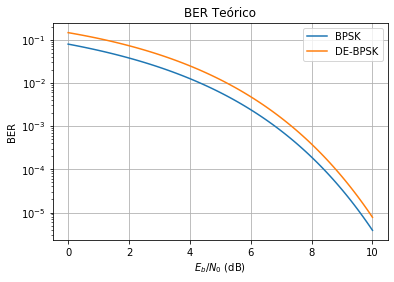

In [11]:
plt.semilogy(x_data, y_data_bpsk, label = "BPSK")
plt.semilogy(x_data, y_data_dbpsk, label = "DE-BPSK")
plt.legend()
plt.title("BER Teórico")
plt.xlabel("$E_b/N_0$ (dB)")
plt.ylabel("BER")
plt.grid()
# plt.savefig("a.pdf", dpi = 200)

In [12]:
import pandas as pd

In [13]:
pd_data = np.array([x_data, y_data_bpsk, y_data_dbpsk]).T

In [14]:
dF = pd.DataFrame(data = pd_data, columns = ["Eb/N0", "BPSK", "DE-BPSK"])

In [15]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [16]:
dF

,Eb/N0,BPSK,DE-BPSK
0,0.00000000,0.07864960,0.14492769
1,0.10000000,0.07627397,0.14091250
2,0.20000000,0.07392678,0.13692323
3,0.30000000,0.07160898,0.13296228
4,0.40000000,0.06932149,0.12903204
...,...,...,...
96,9.60000000,0.00000974,0.00001947
97,9.70000000,0.00000779,0.00001558
98,9.80000000,0.00000620,0.00001241
99,9.90000000,0.00000491,0.00000983


In [17]:
##################

In [18]:
y_data_qpsk = [Pb_QPSK(from_dB(x)) for x in x_data]
y_data_dqpsk = [Pb_DE_QPSK(from_dB(x)) for x in x_data]

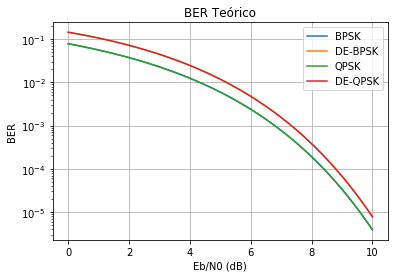

In [19]:
plt.semilogy(x_data, y_data_bpsk, label = "BPSK")
plt.semilogy(x_data, y_data_dbpsk, label = "DE-BPSK")
plt.semilogy(x_data, y_data_qpsk, label = "QPSK")
plt.semilogy(x_data, y_data_dqpsk, label = "DE-QPSK")
plt.legend()
plt.title("BER Teórico")
plt.xlabel("Eb/N0 (dB)")
plt.ylabel("BER")
plt.grid()
# plt.savefig("a.png", dpi = 200)

In [20]:
######

In [21]:
from scipy.special import comb

In [22]:
BCH = (15, 7, 2)

In [23]:
def Pb_Hard_Codes(p, N, t):
    Sum = 0
    for m in range(t+1, N + 1):
        x = (m + t) * comb(N, m, exact = True, repetition = False) * p ** (m) * (1 - p) ** (N - m)
        Sum += x
    return Sum/N

In [24]:
[x for i, x in enumerate([Pb_BPSK(from_dB(SNR - 10 * math.log10(BCH[0]/BCH[1]))) for SNR in x_data])if i % 10 == 0]

[0.16699912791099902,
 0.1391884274979276,
 0.11194723197283957,
 0.08618296922094187,
 0.06286587947199844,
 0.042900028969073335,
 0.02695204316843122,
 0.015277894362140328,
 0.007618155110273656,
 0.0032363990746661774,
 0.0011251132840428954]

In [25]:
BCH_15_2 = (15, 7, 2)
coded_15_2 = [Pb_Hard_Codes(Pb_BPSK(from_dB(SNR - 10 * math.log10(BCH_15_2[0]/BCH_15_2[1]))), BCH_15_2[0], BCH_15_2[2]) for SNR in x_data]

In [26]:
BCH_63 = (63, 30, 6)
coded_63 = [Pb_Hard_Codes(Pb_BPSK(from_dB(SNR - 10 * math.log10(BCH_63[0]/BCH_63[1]))), BCH_63[0], BCH_63[2]) for SNR in x_data]

In [27]:
Hamming = (7, 4, 1)
hamming_y = [Pb_Hard_Codes(Pb_BPSK(from_dB(SNR - 10 * math.log10(Hamming[0]/Hamming[1]))), Hamming[0], Hamming[2]) for SNR in x_data]

In [28]:
# y_data_bpsk

In [29]:
import math

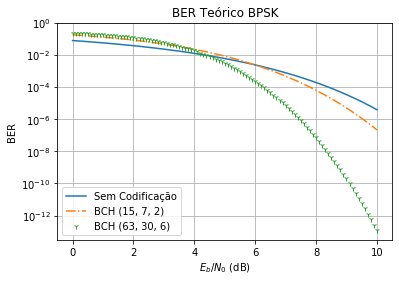

In [30]:
plt.semilogy(x_data, y_data_bpsk, label = "Sem Codificação")
# plt.semilogy(x_data - 1 * 10 * math.log10(Hamming[1]/Hamming[0]), hamming_y, "-.", label = "Hamming (7, 4)")
# plt.semilogy(x_data, hamming_y, "-.", label = "Hamming (7, 4)")

plt.semilogy(x_data, coded_15_2, "-.", label = f"BCH {BCH_15_2}")
plt.semilogy(x_data, coded_63, "1", label = f"BCH {BCH_63}")

plt.legend()
plt.title("BER Teórico BPSK")
plt.xlabel(r"$E_b/N_0$ (dB)")
# plt.xlabel(r"SNR (dB)")
plt.ylabel("BER")
plt.grid()

# plt.savefig(f"EbN0.pdf", dpi = 300)
# plt.savefig(f"BCHs.pdf", dpi = 300)